# Laboratorio 3

- Mark Albrand
- Jimena Hernández
- Javier Ramírez

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [26]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [27]:
nRows,nCols,nDims = train_images.shape[1:]

train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)

input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size = 0.2, random_state = 0)

print('Training data shape : ', X_train.shape, y_train.shape)
print('Validation data shape : ', X_val.shape, y_val.shape)
print('Testing data shape : ', test_data.shape, test_labels.shape)


Training data shape :  (40000, 32, 32, 3) (40000, 1)
Validation data shape :  (10000, 32, 32, 3) (10000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [29]:
dim1 = []
dim2 = []

for i in train_data:
    d1, d2 , colors = i.shape
    dim1.append(d1)
    dim2.append(d2)


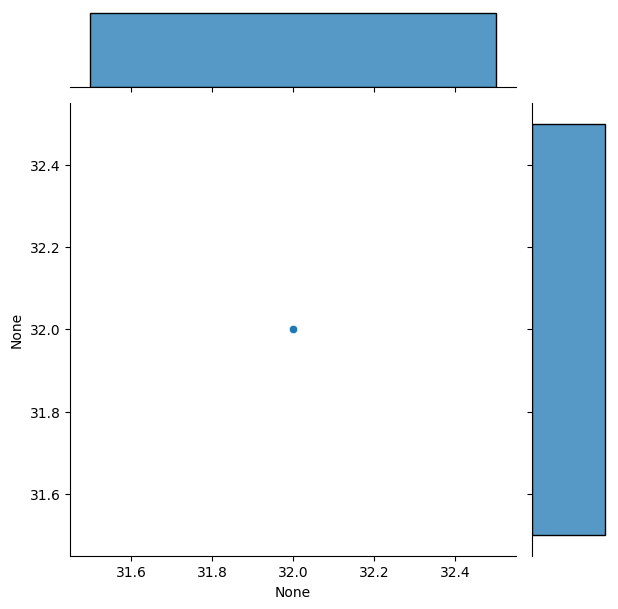

In [30]:
sns.jointplot(x = dim1, y = dim2)

### Encontrando el total de clases 

In [31]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

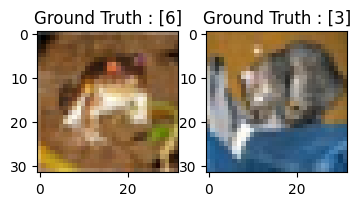

In [32]:
plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

### Normalizando los datos

In [33]:
X_train /= 255
test_data /= 255
X_val /= 255

train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(test_labels)
val_labels_one_hot = to_categorical(y_val)

In [34]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [35]:
from keras.layers import BatchNormalization
from keras.regularizers import l2

def createModel():
    model = Sequential()
    
    model.add(Conv2D(32, (4, 4), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (4, 4), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))

    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [36]:
model1 = createModel()
batch_size = 64
epochs = 75

model1.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy', 'precision'], 
    #run_eagerly=True
)

c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [38]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 782,602 (2.99 MB)

 Trainable params: 782,346 (2.98 MB)

 Non-trainable params: 256 (1.00 KB)

In [39]:
history = model1.fit(
    X_train,
    train_labels_one_hot,
    validation_data=(X_val, val_labels_one_hot),
    batch_size=batch_size, 
    epochs=epochs, 
    #callbacks=[early_stop],
    verbose=1
)

Epoch 1/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.3332 - loss: 5.0220 - precision: 0.5110 - val_accuracy: 0.4625 - val_loss: 1.8375 - val_precision: 0.6259
Epoch 2/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.5393 - loss: 1.6608 - precision: 0.7056 - val_accuracy: 0.4811 - val_loss: 1.9227 - val_precision: 0.6132
Epoch 3/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6007 - loss: 1.4996 - precision: 0.7444 - val_accuracy: 0.6099 - val_loss: 1.4765 - val_precision: 0.7616
Epoch 4/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6386 - loss: 1.3987 - precision: 0.7704 - val_accuracy: 0.5851 - val_loss: 1.5310 - val_precision: 0.6952
Epoch 5/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6633 - loss: 1.3297 - precision: 0.7811 - val_accuracy: 0.6549 - val_loss: 1.3410 - val_precision: 0.7641
Epoch 6/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6713 - loss: 1.2887 - precision: 0.7863 - val_accuracy: 0.6858

<Axes: >

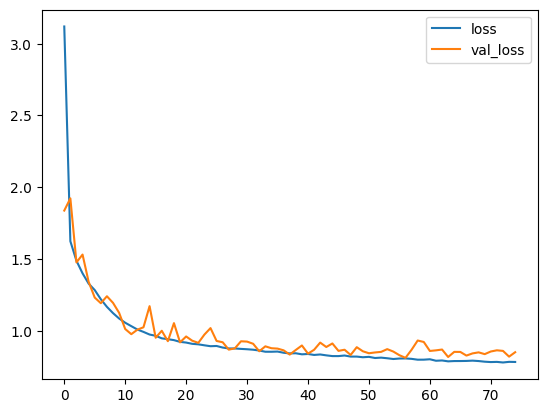

In [40]:
perdidas = pd.DataFrame(model1.history.history)
perdidas[['loss','val_loss']].plot()

Text(0.5, 1.0, 'Accuracy Curves')

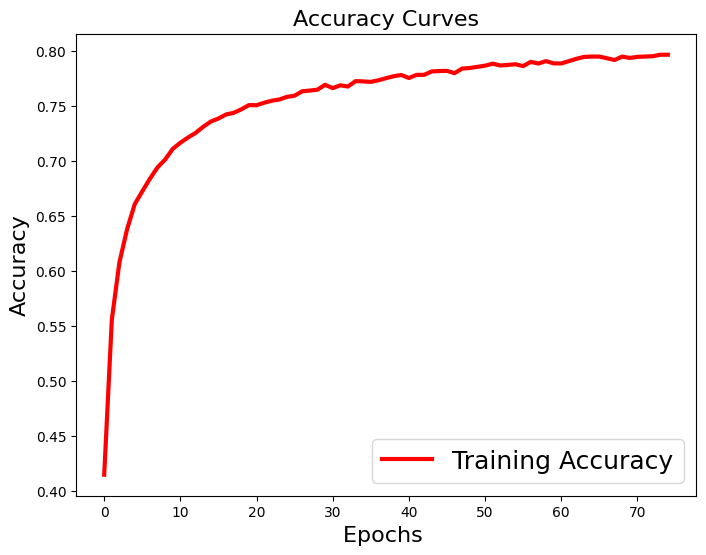

In [41]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [46]:
model1.evaluate(test_data, test_labels_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7754 - loss: 0.8448 - precision: 0.8253


[0.8549519777297974, 0.7728000283241272, 0.8234694004058838]

In [43]:
predictions = model1.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


0 - Avion  
1 - Carros  
2 - Pajaro  
3 - Gatos  
4 - Venado  
5 - Perros  
6 - Ranas  
7 - Caballos  
8 - Botes  
9 - Camiones  

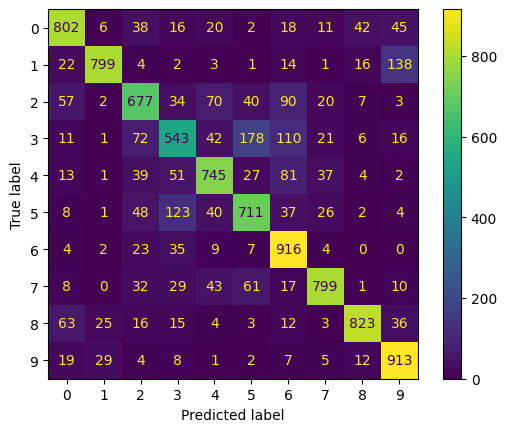

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels_one_hot.argmax(axis=1), predictions.argmax(axis=1))

ConfusionMatrixDisplay(cm).plot()

In [45]:
from sklearn.metrics import classification_report

print(classification_report(test_labels_one_hot.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.92      0.80      0.86      1000
           2       0.71      0.68      0.69      1000
           3       0.63      0.54      0.59      1000
           4       0.76      0.74      0.75      1000
           5       0.69      0.71      0.70      1000
           6       0.70      0.92      0.80      1000
           7       0.86      0.80      0.83      1000
           8       0.90      0.82      0.86      1000
           9       0.78      0.91      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

